### Stochastic gradient descent vs. gradient descent

+ Here, we consider two cases: linear regression and logistic regression

### Well-conditioned linear regression

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 2, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

# Add noise
e = np.random.randn(n)
std = 1e-2
e = std * e / la.norm(e)

y = A.dot(x_star) + e

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

1.999999999999999


In [2]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [5]:
def SGD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Select randomly an index
        j = np.random.randint(n, size = 50)
    
        a = A[j, :]
        a_t = a.T
        
        # Compute gradient
        grad = - a_t.dot(y[j] - a.dot(x_new))
    
        eta = 1/(i+3)
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list


iter# = 0, ||x_new - x_old||_2 = 0.6195032350647787
iter# = 1, ||x_new - x_old||_2 = 0.20742980678173267
iter# = 2, ||x_new - x_old||_2 = 0.10620057827117055
iter# = 3, ||x_new - x_old||_2 = 0.06240182269986077
iter# = 4, ||x_new - x_old||_2 = 0.03927665401582811
iter# = 5, ||x_new - x_old||_2 = 0.02572873852111288
iter# = 6, ||x_new - x_old||_2 = 0.01728692193593299
iter# = 7, ||x_new - x_old||_2 = 0.011817329277837569
iter# = 8, ||x_new - x_old||_2 = 0.00817963110585241
iter# = 9, ||x_new - x_old||_2 = 0.005715290275296339
iter# = 10, ||x_new - x_old||_2 = 0.00402299614926245
iter# = 11, ||x_new - x_old||_2 = 0.0028487204894208818
iter# = 12, ||x_new - x_old||_2 = 0.002027168921049818
iter# = 13, ||x_new - x_old||_2 = 0.001448548139508465
iter# = 14, ||x_new - x_old||_2 = 0.0010387689581380418
iter# = 15, ||x_new - x_old||_2 = 0.0007472104935940165
iter# = 16, ||x_new - x_old||_2 = 0.000538939293612423
iter# = 17, ||x_new - x_old||_2 = 0.0003896497676122554
iter# = 18, ||x_new - x_ol

iter# = 297, ||x_new - x_old||_2 = 0.0008931234631262294
iter# = 298, ||x_new - x_old||_2 = 0.0009762191911888221
iter# = 299, ||x_new - x_old||_2 = 0.001006843030598732
iter# = 300, ||x_new - x_old||_2 = 0.001102207496783052
iter# = 301, ||x_new - x_old||_2 = 0.0009064351121119123
iter# = 302, ||x_new - x_old||_2 = 0.0011150162497904357
iter# = 303, ||x_new - x_old||_2 = 0.0010985920063639953
iter# = 304, ||x_new - x_old||_2 = 0.00102129579510766
iter# = 305, ||x_new - x_old||_2 = 0.0009810584979720175
iter# = 306, ||x_new - x_old||_2 = 0.00120846770512569
iter# = 307, ||x_new - x_old||_2 = 0.00134322362141226
iter# = 308, ||x_new - x_old||_2 = 0.0009906283835855569
iter# = 309, ||x_new - x_old||_2 = 0.0007694707873282078
iter# = 310, ||x_new - x_old||_2 = 0.0010080913255147005
iter# = 311, ||x_new - x_old||_2 = 0.0010744351540986153
iter# = 312, ||x_new - x_old||_2 = 0.0009860728303726447
iter# = 313, ||x_new - x_old||_2 = 0.0010078470277714137
iter# = 314, ||x_new - x_old||_2 = 0.00

iter# = 709, ||x_new - x_old||_2 = 0.0003573868885790361
iter# = 710, ||x_new - x_old||_2 = 0.00034567945512759517
iter# = 711, ||x_new - x_old||_2 = 0.0003415566215956487
iter# = 712, ||x_new - x_old||_2 = 0.0003904469869469921
iter# = 713, ||x_new - x_old||_2 = 0.0004265085294900831
iter# = 714, ||x_new - x_old||_2 = 0.0004950837345275282
iter# = 715, ||x_new - x_old||_2 = 0.0004416367503754407
iter# = 716, ||x_new - x_old||_2 = 0.00030686968464312955
iter# = 717, ||x_new - x_old||_2 = 0.00039419830023543185
iter# = 718, ||x_new - x_old||_2 = 0.00040658731845110124
iter# = 719, ||x_new - x_old||_2 = 0.00043119526679944527
iter# = 720, ||x_new - x_old||_2 = 0.00033847764495202446
iter# = 721, ||x_new - x_old||_2 = 0.0003776360086146281
iter# = 722, ||x_new - x_old||_2 = 0.00041387062429763745
iter# = 723, ||x_new - x_old||_2 = 0.0004392259224020837
iter# = 724, ||x_new - x_old||_2 = 0.000341239065681249
iter# = 725, ||x_new - x_old||_2 = 0.00034126521768839367
iter# = 726, ||x_new - x

iter# = 1116, ||x_new - x_old||_2 = 0.0002998132746281603
iter# = 1117, ||x_new - x_old||_2 = 0.00021796266465061036
iter# = 1118, ||x_new - x_old||_2 = 0.0002565433023080225
iter# = 1119, ||x_new - x_old||_2 = 0.0002646863979368467
iter# = 1120, ||x_new - x_old||_2 = 0.0002395470732334597
iter# = 1121, ||x_new - x_old||_2 = 0.00018293053909503346
iter# = 1122, ||x_new - x_old||_2 = 0.00022993497367841014
iter# = 1123, ||x_new - x_old||_2 = 0.00023593233068527834
iter# = 1124, ||x_new - x_old||_2 = 0.0002706840041355799
iter# = 1125, ||x_new - x_old||_2 = 0.00022307075541923714
iter# = 1126, ||x_new - x_old||_2 = 0.00024069444206040243
iter# = 1127, ||x_new - x_old||_2 = 0.00022946856622444378
iter# = 1128, ||x_new - x_old||_2 = 0.00027169087028333254
iter# = 1129, ||x_new - x_old||_2 = 0.00022438635380081967
iter# = 1130, ||x_new - x_old||_2 = 0.0002617860673186328
iter# = 1131, ||x_new - x_old||_2 = 0.00022825991377526555
iter# = 1132, ||x_new - x_old||_2 = 0.00023392529158165293
ite

iter# = 1530, ||x_new - x_old||_2 = 0.00017606692379438108
iter# = 1531, ||x_new - x_old||_2 = 0.00016128153380744965
iter# = 1532, ||x_new - x_old||_2 = 0.00018541234510834908
iter# = 1533, ||x_new - x_old||_2 = 0.00021041090074339083
iter# = 1534, ||x_new - x_old||_2 = 0.00018914240975703272
iter# = 1535, ||x_new - x_old||_2 = 0.00014198305706331787
iter# = 1536, ||x_new - x_old||_2 = 0.000181779252629855
iter# = 1537, ||x_new - x_old||_2 = 0.00019727264926644773
iter# = 1538, ||x_new - x_old||_2 = 0.0001637601936593737
iter# = 1539, ||x_new - x_old||_2 = 0.00013972346910145304
iter# = 1540, ||x_new - x_old||_2 = 0.00018789237913207865
iter# = 1541, ||x_new - x_old||_2 = 0.00016778535730786883
iter# = 1542, ||x_new - x_old||_2 = 0.00017363267149076214
iter# = 1543, ||x_new - x_old||_2 = 0.00014944423991561614
iter# = 1544, ||x_new - x_old||_2 = 0.0001566575164196731
iter# = 1545, ||x_new - x_old||_2 = 0.00014822597348178573
iter# = 1546, ||x_new - x_old||_2 = 0.0001419126145960723
it

iter# = 1945, ||x_new - x_old||_2 = 0.00013677322636816428
iter# = 1946, ||x_new - x_old||_2 = 0.00013045428769194642
iter# = 1947, ||x_new - x_old||_2 = 0.00015525688503253854
iter# = 1948, ||x_new - x_old||_2 = 0.00016922184106092788
iter# = 1949, ||x_new - x_old||_2 = 0.00013622633105894142
iter# = 1950, ||x_new - x_old||_2 = 0.00011278078445805364
iter# = 1951, ||x_new - x_old||_2 = 9.308256760349578e-05
iter# = 1952, ||x_new - x_old||_2 = 0.0001346525514160537
iter# = 1953, ||x_new - x_old||_2 = 0.0001338605976502834
iter# = 1954, ||x_new - x_old||_2 = 0.00013289652661046823
iter# = 1955, ||x_new - x_old||_2 = 0.00012617599897468131
iter# = 1956, ||x_new - x_old||_2 = 0.00013904987837444726
iter# = 1957, ||x_new - x_old||_2 = 0.00013378665458259486
iter# = 1958, ||x_new - x_old||_2 = 0.00013958145761274558
iter# = 1959, ||x_new - x_old||_2 = 0.000117862763456596
iter# = 1960, ||x_new - x_old||_2 = 0.00011608252702417951
iter# = 1961, ||x_new - x_old||_2 = 0.00013278951692836252
it

iter# = 2364, ||x_new - x_old||_2 = 9.986967292071717e-05
iter# = 2365, ||x_new - x_old||_2 = 0.0001048047015811611
iter# = 2366, ||x_new - x_old||_2 = 8.97735009097201e-05
iter# = 2367, ||x_new - x_old||_2 = 0.00010038671203215383
iter# = 2368, ||x_new - x_old||_2 = 9.602585811760692e-05
iter# = 2369, ||x_new - x_old||_2 = 0.00010823000788458219
iter# = 2370, ||x_new - x_old||_2 = 0.0001060371042578757
iter# = 2371, ||x_new - x_old||_2 = 0.0001049569762723116
iter# = 2372, ||x_new - x_old||_2 = 0.00012025439757146657
iter# = 2373, ||x_new - x_old||_2 = 9.527662735847517e-05
iter# = 2374, ||x_new - x_old||_2 = 9.06781202866638e-05
iter# = 2375, ||x_new - x_old||_2 = 9.444432405535683e-05
iter# = 2376, ||x_new - x_old||_2 = 0.0001170978928375831
iter# = 2377, ||x_new - x_old||_2 = 0.00010008908516613709
iter# = 2378, ||x_new - x_old||_2 = 9.896900685791867e-05
iter# = 2379, ||x_new - x_old||_2 = 9.792307117067006e-05
iter# = 2380, ||x_new - x_old||_2 = 0.00010970623022676365
iter# = 238

iter# = 2817, ||x_new - x_old||_2 = 8.73397885163999e-05
iter# = 2818, ||x_new - x_old||_2 = 9.95809354600799e-05
iter# = 2819, ||x_new - x_old||_2 = 9.404726788117655e-05
iter# = 2820, ||x_new - x_old||_2 = 8.747015389360885e-05
iter# = 2821, ||x_new - x_old||_2 = 0.00010531138545092086
iter# = 2822, ||x_new - x_old||_2 = 0.00011003206864035754
iter# = 2823, ||x_new - x_old||_2 = 0.00010536227607983568
iter# = 2824, ||x_new - x_old||_2 = 8.502885138028127e-05
iter# = 2825, ||x_new - x_old||_2 = 7.473397964529963e-05
iter# = 2826, ||x_new - x_old||_2 = 0.00010341340798339363
iter# = 2827, ||x_new - x_old||_2 = 6.895535978711284e-05
iter# = 2828, ||x_new - x_old||_2 = 7.101001379226442e-05
iter# = 2829, ||x_new - x_old||_2 = 7.785295407791263e-05
iter# = 2830, ||x_new - x_old||_2 = 7.066220897298845e-05
iter# = 2831, ||x_new - x_old||_2 = 9.206555676821993e-05
iter# = 2832, ||x_new - x_old||_2 = 9.832932703243019e-05
iter# = 2833, ||x_new - x_old||_2 = 5.9984474876751624e-05
iter# = 283

iter# = 3247, ||x_new - x_old||_2 = 6.325827202414055e-05
iter# = 3248, ||x_new - x_old||_2 = 7.508466478685919e-05
iter# = 3249, ||x_new - x_old||_2 = 7.75618042521168e-05
iter# = 3250, ||x_new - x_old||_2 = 7.898767579978971e-05
iter# = 3251, ||x_new - x_old||_2 = 6.168190785899041e-05
iter# = 3252, ||x_new - x_old||_2 = 8.08080914517848e-05
iter# = 3253, ||x_new - x_old||_2 = 6.923196285759745e-05
iter# = 3254, ||x_new - x_old||_2 = 8.099934057712995e-05
iter# = 3255, ||x_new - x_old||_2 = 6.025683741964918e-05
iter# = 3256, ||x_new - x_old||_2 = 8.535327500907483e-05
iter# = 3257, ||x_new - x_old||_2 = 7.655089754994564e-05
iter# = 3258, ||x_new - x_old||_2 = 6.111638962165632e-05
iter# = 3259, ||x_new - x_old||_2 = 9.656542987712722e-05
iter# = 3260, ||x_new - x_old||_2 = 7.954647192540271e-05
iter# = 3261, ||x_new - x_old||_2 = 8.131466520848202e-05
iter# = 3262, ||x_new - x_old||_2 = 5.849768786838902e-05
iter# = 3263, ||x_new - x_old||_2 = 6.778157913838548e-05
iter# = 3264, ||

iter# = 3741, ||x_new - x_old||_2 = 7.243366961414965e-05
iter# = 3742, ||x_new - x_old||_2 = 5.1605296884981054e-05
iter# = 3743, ||x_new - x_old||_2 = 5.319558288146242e-05
iter# = 3744, ||x_new - x_old||_2 = 5.045752247634075e-05
iter# = 3745, ||x_new - x_old||_2 = 5.4178637526989745e-05
iter# = 3746, ||x_new - x_old||_2 = 7.345061435028981e-05
iter# = 3747, ||x_new - x_old||_2 = 5.757503206967774e-05
iter# = 3748, ||x_new - x_old||_2 = 7.086529946925703e-05
iter# = 3749, ||x_new - x_old||_2 = 5.341231972357983e-05
iter# = 3750, ||x_new - x_old||_2 = 6.7860419099757e-05
iter# = 3751, ||x_new - x_old||_2 = 7.96767380263189e-05
iter# = 3752, ||x_new - x_old||_2 = 6.685549429716537e-05
iter# = 3753, ||x_new - x_old||_2 = 5.490039677834912e-05
iter# = 3754, ||x_new - x_old||_2 = 6.169006397163664e-05
iter# = 3755, ||x_new - x_old||_2 = 6.313853158466324e-05
iter# = 3756, ||x_new - x_old||_2 = 6.642286141420845e-05
iter# = 3757, ||x_new - x_old||_2 = 4.776634667986134e-05
iter# = 3758, |

iter# = 4237, ||x_new - x_old||_2 = 4.5506267270445766e-05
iter# = 4238, ||x_new - x_old||_2 = 5.801006832486124e-05
iter# = 4239, ||x_new - x_old||_2 = 4.807773231671846e-05
iter# = 4240, ||x_new - x_old||_2 = 4.303832863478425e-05
iter# = 4241, ||x_new - x_old||_2 = 5.139608902482982e-05
iter# = 4242, ||x_new - x_old||_2 = 6.862636435741725e-05
iter# = 4243, ||x_new - x_old||_2 = 5.6003877613926815e-05
iter# = 4244, ||x_new - x_old||_2 = 4.528214969591379e-05
iter# = 4245, ||x_new - x_old||_2 = 4.586034536031491e-05
iter# = 4246, ||x_new - x_old||_2 = 6.484013137802303e-05
iter# = 4247, ||x_new - x_old||_2 = 5.6143346460524e-05
iter# = 4248, ||x_new - x_old||_2 = 5.859922365110242e-05
iter# = 4249, ||x_new - x_old||_2 = 5.2644702961061884e-05
iter# = 4250, ||x_new - x_old||_2 = 6.846894558892324e-05
iter# = 4251, ||x_new - x_old||_2 = 5.371083399763359e-05
iter# = 4252, ||x_new - x_old||_2 = 5.702673827344582e-05
iter# = 4253, ||x_new - x_old||_2 = 3.848772542287749e-05
iter# = 4254,

iter# = 4687, ||x_new - x_old||_2 = 4.430027338752942e-05
iter# = 4688, ||x_new - x_old||_2 = 4.9054426667240115e-05
iter# = 4689, ||x_new - x_old||_2 = 5.8345413269911075e-05
iter# = 4690, ||x_new - x_old||_2 = 4.7630710109626065e-05
iter# = 4691, ||x_new - x_old||_2 = 4.939398947690763e-05
iter# = 4692, ||x_new - x_old||_2 = 4.889065050766753e-05
iter# = 4693, ||x_new - x_old||_2 = 4.877525445670003e-05
iter# = 4694, ||x_new - x_old||_2 = 6.355129652025589e-05
iter# = 4695, ||x_new - x_old||_2 = 4.849354179803978e-05
iter# = 4696, ||x_new - x_old||_2 = 6.46491771102979e-05
iter# = 4697, ||x_new - x_old||_2 = 6.300671488136268e-05
iter# = 4698, ||x_new - x_old||_2 = 4.539008171188671e-05
iter# = 4699, ||x_new - x_old||_2 = 4.796501840232069e-05
iter# = 4700, ||x_new - x_old||_2 = 4.530210202763996e-05
iter# = 4701, ||x_new - x_old||_2 = 6.141589755589471e-05
iter# = 4702, ||x_new - x_old||_2 = 5.940455515872045e-05
iter# = 4703, ||x_new - x_old||_2 = 5.179375142711095e-05
iter# = 4704

iter# = 5096, ||x_new - x_old||_2 = 5.5822451668516914e-05
iter# = 5097, ||x_new - x_old||_2 = 5.149520243829413e-05
iter# = 5098, ||x_new - x_old||_2 = 5.098122268200555e-05
iter# = 5099, ||x_new - x_old||_2 = 3.930912910842337e-05
iter# = 5100, ||x_new - x_old||_2 = 5.2389456919643034e-05
iter# = 5101, ||x_new - x_old||_2 = 4.0142252083900354e-05
iter# = 5102, ||x_new - x_old||_2 = 3.5046129125591644e-05
iter# = 5103, ||x_new - x_old||_2 = 4.310456553927884e-05
iter# = 5104, ||x_new - x_old||_2 = 4.897402422386547e-05
iter# = 5105, ||x_new - x_old||_2 = 4.351994365440795e-05
iter# = 5106, ||x_new - x_old||_2 = 4.4534666303492555e-05
iter# = 5107, ||x_new - x_old||_2 = 4.461444392061303e-05
iter# = 5108, ||x_new - x_old||_2 = 4.30938685646958e-05
iter# = 5109, ||x_new - x_old||_2 = 4.454413088621686e-05
iter# = 5110, ||x_new - x_old||_2 = 4.318259044252134e-05
iter# = 5111, ||x_new - x_old||_2 = 4.482215219639727e-05
iter# = 5112, ||x_new - x_old||_2 = 5.70028437355695e-05
iter# = 511

iter# = 5537, ||x_new - x_old||_2 = 3.901731115812162e-05
iter# = 5538, ||x_new - x_old||_2 = 4.052985566149171e-05
iter# = 5539, ||x_new - x_old||_2 = 3.382244187761681e-05
iter# = 5540, ||x_new - x_old||_2 = 4.345750575332291e-05
iter# = 5541, ||x_new - x_old||_2 = 3.845443091650492e-05
iter# = 5542, ||x_new - x_old||_2 = 3.966725319316932e-05
iter# = 5543, ||x_new - x_old||_2 = 4.2747542825372755e-05
iter# = 5544, ||x_new - x_old||_2 = 3.9543200951638214e-05
iter# = 5545, ||x_new - x_old||_2 = 3.684371395054264e-05
iter# = 5546, ||x_new - x_old||_2 = 3.3573801733099714e-05
iter# = 5547, ||x_new - x_old||_2 = 3.694219853089198e-05
iter# = 5548, ||x_new - x_old||_2 = 4.045509154163173e-05
iter# = 5549, ||x_new - x_old||_2 = 4.15546771095054e-05
iter# = 5550, ||x_new - x_old||_2 = 4.091448757854374e-05
iter# = 5551, ||x_new - x_old||_2 = 3.940396929063424e-05
iter# = 5552, ||x_new - x_old||_2 = 3.472742881147218e-05
iter# = 5553, ||x_new - x_old||_2 = 4.3306580916821166e-05
iter# = 555

iter# = 5982, ||x_new - x_old||_2 = 2.954445246747174e-05
iter# = 5983, ||x_new - x_old||_2 = 3.6366607275694904e-05
iter# = 5984, ||x_new - x_old||_2 = 3.362964498953247e-05
iter# = 5985, ||x_new - x_old||_2 = 3.678954897930942e-05
iter# = 5986, ||x_new - x_old||_2 = 3.261212402744522e-05
iter# = 5987, ||x_new - x_old||_2 = 3.156124411683731e-05
iter# = 5988, ||x_new - x_old||_2 = 3.579477912788699e-05
iter# = 5989, ||x_new - x_old||_2 = 3.2840794724537884e-05
iter# = 5990, ||x_new - x_old||_2 = 4.201350938893897e-05
iter# = 5991, ||x_new - x_old||_2 = 4.249826177117186e-05
iter# = 5992, ||x_new - x_old||_2 = 4.2720180041351915e-05
iter# = 5993, ||x_new - x_old||_2 = 3.9468141963340364e-05
iter# = 5994, ||x_new - x_old||_2 = 3.393347521235913e-05
iter# = 5995, ||x_new - x_old||_2 = 3.783791182776101e-05
iter# = 5996, ||x_new - x_old||_2 = 3.3195721814985824e-05
iter# = 5997, ||x_new - x_old||_2 = 3.664112748213824e-05
iter# = 5998, ||x_new - x_old||_2 = 4.0879575276160116e-05
iter# = 

iter# = 6335, ||x_new - x_old||_2 = 4.28892338173267e-05
iter# = 6336, ||x_new - x_old||_2 = 3.6759218968115394e-05
iter# = 6337, ||x_new - x_old||_2 = 3.723913000984048e-05
iter# = 6338, ||x_new - x_old||_2 = 3.583567415389855e-05
iter# = 6339, ||x_new - x_old||_2 = 3.9008983508292375e-05
iter# = 6340, ||x_new - x_old||_2 = 3.3429933105875426e-05
iter# = 6341, ||x_new - x_old||_2 = 3.92747702923888e-05
iter# = 6342, ||x_new - x_old||_2 = 3.522486430827654e-05
iter# = 6343, ||x_new - x_old||_2 = 3.3097413675058826e-05
iter# = 6344, ||x_new - x_old||_2 = 3.893163269905538e-05
iter# = 6345, ||x_new - x_old||_2 = 3.214475770031058e-05
iter# = 6346, ||x_new - x_old||_2 = 3.485399785371427e-05
iter# = 6347, ||x_new - x_old||_2 = 3.727425704891906e-05
iter# = 6348, ||x_new - x_old||_2 = 2.963426920135904e-05
iter# = 6349, ||x_new - x_old||_2 = 3.05740919289493e-05
iter# = 6350, ||x_new - x_old||_2 = 3.4719037858441246e-05
iter# = 6351, ||x_new - x_old||_2 = 3.034593329345918e-05
iter# = 6352

iter# = 6729, ||x_new - x_old||_2 = 3.379914280224601e-05
iter# = 6730, ||x_new - x_old||_2 = 2.6336487036813643e-05
iter# = 6731, ||x_new - x_old||_2 = 3.167731011253879e-05
iter# = 6732, ||x_new - x_old||_2 = 3.358294655485785e-05
iter# = 6733, ||x_new - x_old||_2 = 3.308688167545526e-05
iter# = 6734, ||x_new - x_old||_2 = 3.023767324782855e-05
iter# = 6735, ||x_new - x_old||_2 = 3.270950645873616e-05
iter# = 6736, ||x_new - x_old||_2 = 2.475242818945052e-05
iter# = 6737, ||x_new - x_old||_2 = 3.0767264752543983e-05
iter# = 6738, ||x_new - x_old||_2 = 3.2712119095021355e-05
iter# = 6739, ||x_new - x_old||_2 = 3.4360287160479006e-05
iter# = 6740, ||x_new - x_old||_2 = 3.127468604128967e-05
iter# = 6741, ||x_new - x_old||_2 = 3.856339262356483e-05
iter# = 6742, ||x_new - x_old||_2 = 3.0096084237853686e-05
iter# = 6743, ||x_new - x_old||_2 = 3.592406633690805e-05
iter# = 6744, ||x_new - x_old||_2 = 3.128770607708452e-05
iter# = 6745, ||x_new - x_old||_2 = 3.793625395728068e-05
iter# = 6

iter# = 7115, ||x_new - x_old||_2 = 3.14627257619404e-05
iter# = 7116, ||x_new - x_old||_2 = 3.1414337441328096e-05
iter# = 7117, ||x_new - x_old||_2 = 3.131902828940097e-05
iter# = 7118, ||x_new - x_old||_2 = 3.728009334829571e-05
iter# = 7119, ||x_new - x_old||_2 = 3.255111173059149e-05
iter# = 7120, ||x_new - x_old||_2 = 3.867124186145852e-05
iter# = 7121, ||x_new - x_old||_2 = 2.2933319282636336e-05
iter# = 7122, ||x_new - x_old||_2 = 3.242815518151995e-05
iter# = 7123, ||x_new - x_old||_2 = 3.3336792975932816e-05
iter# = 7124, ||x_new - x_old||_2 = 2.722355339904924e-05
iter# = 7125, ||x_new - x_old||_2 = 2.8883327820677062e-05
iter# = 7126, ||x_new - x_old||_2 = 2.9579637094292523e-05
iter# = 7127, ||x_new - x_old||_2 = 3.0973946880730436e-05
iter# = 7128, ||x_new - x_old||_2 = 3.510617172773935e-05
iter# = 7129, ||x_new - x_old||_2 = 3.169351220195982e-05
iter# = 7130, ||x_new - x_old||_2 = 3.211923971715162e-05
iter# = 7131, ||x_new - x_old||_2 = 2.830282496731068e-05
iter# = 7

iter# = 7511, ||x_new - x_old||_2 = 2.6045694597908422e-05
iter# = 7512, ||x_new - x_old||_2 = 3.3999093482726244e-05
iter# = 7513, ||x_new - x_old||_2 = 3.1789128185472657e-05
iter# = 7514, ||x_new - x_old||_2 = 2.9379010805875808e-05
iter# = 7515, ||x_new - x_old||_2 = 3.1600575747132494e-05
iter# = 7516, ||x_new - x_old||_2 = 3.0455549664943182e-05
iter# = 7517, ||x_new - x_old||_2 = 2.8398649075775862e-05
iter# = 7518, ||x_new - x_old||_2 = 2.748902066587723e-05
iter# = 7519, ||x_new - x_old||_2 = 2.800580985548699e-05
iter# = 7520, ||x_new - x_old||_2 = 3.1094820590786155e-05
iter# = 7521, ||x_new - x_old||_2 = 2.713375473229573e-05
iter# = 7522, ||x_new - x_old||_2 = 2.5667556292237498e-05
iter# = 7523, ||x_new - x_old||_2 = 2.3722310906141484e-05
iter# = 7524, ||x_new - x_old||_2 = 2.614259303724142e-05
iter# = 7525, ||x_new - x_old||_2 = 2.814794318548925e-05
iter# = 7526, ||x_new - x_old||_2 = 2.0322674792180425e-05
iter# = 7527, ||x_new - x_old||_2 = 2.6793285695005958e-05
it

iter# = 7939, ||x_new - x_old||_2 = 2.518099725864928e-05
iter# = 7940, ||x_new - x_old||_2 = 3.3633791249803486e-05
iter# = 7941, ||x_new - x_old||_2 = 2.773804377435641e-05
iter# = 7942, ||x_new - x_old||_2 = 2.348205319660549e-05
iter# = 7943, ||x_new - x_old||_2 = 3.1659472487517843e-05
iter# = 7944, ||x_new - x_old||_2 = 2.592298856875226e-05
iter# = 7945, ||x_new - x_old||_2 = 2.150660635799897e-05
iter# = 7946, ||x_new - x_old||_2 = 3.016684025312529e-05
iter# = 7947, ||x_new - x_old||_2 = 2.6074595489504984e-05
iter# = 7948, ||x_new - x_old||_2 = 2.895453781306205e-05
iter# = 7949, ||x_new - x_old||_2 = 2.3462276991351066e-05
iter# = 7950, ||x_new - x_old||_2 = 2.2615120069539136e-05
iter# = 7951, ||x_new - x_old||_2 = 2.5760958886647212e-05
iter# = 7952, ||x_new - x_old||_2 = 2.6374792912764952e-05
iter# = 7953, ||x_new - x_old||_2 = 2.6392350969247392e-05
iter# = 7954, ||x_new - x_old||_2 = 2.800115160812644e-05
iter# = 7955, ||x_new - x_old||_2 = 2.6690659205029813e-05
iter#

iter# = 8347, ||x_new - x_old||_2 = 2.3867689104808582e-05
iter# = 8348, ||x_new - x_old||_2 = 2.9070157669193234e-05
iter# = 8349, ||x_new - x_old||_2 = 2.8878820504492468e-05
iter# = 8350, ||x_new - x_old||_2 = 1.773154406378708e-05
iter# = 8351, ||x_new - x_old||_2 = 2.2375324048378613e-05
iter# = 8352, ||x_new - x_old||_2 = 3.0432125923279568e-05
iter# = 8353, ||x_new - x_old||_2 = 2.4648123701411997e-05
iter# = 8354, ||x_new - x_old||_2 = 2.9204245715897607e-05
iter# = 8355, ||x_new - x_old||_2 = 2.6068527076863263e-05
iter# = 8356, ||x_new - x_old||_2 = 2.442632389415151e-05
iter# = 8357, ||x_new - x_old||_2 = 2.719445439580485e-05
iter# = 8358, ||x_new - x_old||_2 = 2.4345718649110234e-05
iter# = 8359, ||x_new - x_old||_2 = 3.218955411625467e-05
iter# = 8360, ||x_new - x_old||_2 = 2.436140929224914e-05
iter# = 8361, ||x_new - x_old||_2 = 2.4517998696420466e-05
iter# = 8362, ||x_new - x_old||_2 = 3.353017570638351e-05
iter# = 8363, ||x_new - x_old||_2 = 2.4763331331315557e-05
ite

iter# = 8755, ||x_new - x_old||_2 = 2.2136058821378913e-05
iter# = 8756, ||x_new - x_old||_2 = 2.248857514059144e-05
iter# = 8757, ||x_new - x_old||_2 = 2.1549006984341836e-05
iter# = 8758, ||x_new - x_old||_2 = 2.473558128996189e-05
iter# = 8759, ||x_new - x_old||_2 = 1.96724114154857e-05
iter# = 8760, ||x_new - x_old||_2 = 2.3767515763851435e-05
iter# = 8761, ||x_new - x_old||_2 = 2.0018096615869063e-05
iter# = 8762, ||x_new - x_old||_2 = 2.46956609390517e-05
iter# = 8763, ||x_new - x_old||_2 = 2.4977956530807203e-05
iter# = 8764, ||x_new - x_old||_2 = 2.4363832340746402e-05
iter# = 8765, ||x_new - x_old||_2 = 2.0906767905137037e-05
iter# = 8766, ||x_new - x_old||_2 = 2.334969655743378e-05
iter# = 8767, ||x_new - x_old||_2 = 2.2038087614976348e-05
iter# = 8768, ||x_new - x_old||_2 = 2.0932900251130945e-05
iter# = 8769, ||x_new - x_old||_2 = 2.6768116492329863e-05
iter# = 8770, ||x_new - x_old||_2 = 2.257134077797131e-05
iter# = 8771, ||x_new - x_old||_2 = 2.4837900733723756e-05
iter#

iter# = 9316, ||x_new - x_old||_2 = 2.564080691925133e-05
iter# = 9317, ||x_new - x_old||_2 = 2.7134506961504844e-05
iter# = 9318, ||x_new - x_old||_2 = 2.488227942165799e-05
iter# = 9319, ||x_new - x_old||_2 = 2.327667276173286e-05
iter# = 9320, ||x_new - x_old||_2 = 2.383187745953523e-05
iter# = 9321, ||x_new - x_old||_2 = 1.9389114531959363e-05
iter# = 9322, ||x_new - x_old||_2 = 2.583253506203682e-05
iter# = 9323, ||x_new - x_old||_2 = 2.136305494607995e-05
iter# = 9324, ||x_new - x_old||_2 = 1.9990663079282694e-05
iter# = 9325, ||x_new - x_old||_2 = 2.5887937937898445e-05
iter# = 9326, ||x_new - x_old||_2 = 2.6100264662070618e-05
iter# = 9327, ||x_new - x_old||_2 = 2.2279826028008494e-05
iter# = 9328, ||x_new - x_old||_2 = 2.142100107909991e-05
iter# = 9329, ||x_new - x_old||_2 = 2.6790417318355128e-05
iter# = 9330, ||x_new - x_old||_2 = 2.047963044703101e-05
iter# = 9331, ||x_new - x_old||_2 = 1.8055968552003972e-05
iter# = 9332, ||x_new - x_old||_2 = 1.6321525603965843e-05
iter#

iter# = 9862, ||x_new - x_old||_2 = 2.1008325931110835e-05
iter# = 9863, ||x_new - x_old||_2 = 2.0016299871142447e-05
iter# = 9864, ||x_new - x_old||_2 = 2.3290968398456476e-05
iter# = 9865, ||x_new - x_old||_2 = 2.1230765235725482e-05
iter# = 9866, ||x_new - x_old||_2 = 2.1395451910872954e-05
iter# = 9867, ||x_new - x_old||_2 = 1.965374062345333e-05
iter# = 9868, ||x_new - x_old||_2 = 2.2495821987663425e-05
iter# = 9869, ||x_new - x_old||_2 = 2.2983937170057663e-05
iter# = 9870, ||x_new - x_old||_2 = 2.1485304184732133e-05
iter# = 9871, ||x_new - x_old||_2 = 2.5256249937178596e-05
iter# = 9872, ||x_new - x_old||_2 = 1.9925775679336805e-05
iter# = 9873, ||x_new - x_old||_2 = 2.3141265300584613e-05
iter# = 9874, ||x_new - x_old||_2 = 2.3883809535891838e-05
iter# = 9875, ||x_new - x_old||_2 = 2.1115129555252624e-05
iter# = 9876, ||x_new - x_old||_2 = 2.3678045182989063e-05
iter# = 9877, ||x_new - x_old||_2 = 2.0620907156358034e-05
iter# = 9878, ||x_new - x_old||_2 = 2.0511670851510136e-0

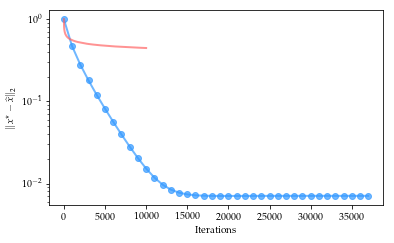

In [6]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta = 1/L
# eta decreasing

x_GD, x_list_GD, f_list_GD = GD(y, A, eta, iters, epsilon, True, x_star)
iters = 10000
x_SGD, x_list_SGD, f_list_SGD = SGD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(x_list_GD)*n, n)
xs_SGD = range(len(x_list_SGD))
plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, x_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Logistic regression

In [7]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from numpy import linalg as la

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [8]:
# Returns the value of the objecive function
def f(x, y, A, l):
    f_val = 0
    n, p = np.shape(A)
    
    for i in range(n):
        a = A[i, :]
        f_val += (1/n) * np.log(1 + np.exp(-y[i] * a.dot(x))) 
    f_val += l * la.norm(x)**2
    
    return f_val

In [9]:
def GD_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        for j in range(n):
            a = A[j, :]
            grad += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad += 2 * l * x_old
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

In [10]:
def SGD_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = np.zeros(p)
        
        J = np.random.randint(n, size = 50)
        for j in J:
            a = A[j, :]
            grad += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad += 2 * l * x_old
    
        # Perform gradient step
        x_new = x_old - eta * grad    
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

iter# = 0, ||x_new - x_old||_2 = 1.6830337894057272, f(x_new) = 101.75839441071223
iter# = 1, ||x_new - x_old||_2 = 1.5988533159204152, f(x_new) = 91.78880021550142
iter# = 2, ||x_new - x_old||_2 = 1.5188784170087941, f(x_new) = 82.7916394965005
iter# = 3, ||x_new - x_old||_2 = 1.4428984083008976, f(x_new) = 74.67212528256204
iter# = 4, ||x_new - x_old||_2 = 1.3707130899121174, f(x_new) = 67.3447138841841
iter# = 5, ||x_new - x_old||_2 = 1.3021322152479835, f(x_new) = 60.7322038031047
iter# = 6, ||x_new - x_old||_2 = 1.2369749854101564, f(x_new) = 54.76492251339853
iter# = 7, ||x_new - x_old||_2 = 1.175069567858816, f(x_new) = 49.379992546190834
iter# = 8, ||x_new - x_old||_2 = 1.1162526380681743, f(x_new) = 44.520669144932796
iter# = 9, ||x_new - x_old||_2 = 1.0603689429513754, f(x_new) = 40.13574251204487
iter# = 10, ||x_new - x_old||_2 = 1.0072708847977796, f(x_new) = 36.178998348938904
iter# = 11, ||x_new - x_old||_2 = 0.9568181243742587, f(x_new) = 32.60873100705353
iter# = 12, ||

iter# = 97, ||x_new - x_old||_2 = 0.0009854442300673528, f(x_new) = 0.6656659024162223
iter# = 98, ||x_new - x_old||_2 = 0.0008980224325468482, f(x_new) = 0.6656628195407817
iter# = 99, ||x_new - x_old||_2 = 0.000818491070311148, f(x_new) = 0.6656602583442442
Number of steps: 101
iter# = 0, ||x_new - x_old||_2 = 1.580795660361797, f(x_new) = 102.41916259914551
iter# = 1, ||x_new - x_old||_2 = 1.501907729616337, f(x_new) = 93.01431262017097
iter# = 2, ||x_new - x_old||_2 = 1.4268899097636918, f(x_new) = 84.49717166608308
iter# = 3, ||x_new - x_old||_2 = 1.3554644428272975, f(x_new) = 76.78369617732736
iter# = 4, ||x_new - x_old||_2 = 1.287537879361759, f(x_new) = 69.79718552710324
iter# = 5, ||x_new - x_old||_2 = 1.2232282104744614, f(x_new) = 63.466871854212876
iter# = 6, ||x_new - x_old||_2 = 1.1620716560131528, f(x_new) = 57.730356544184815
iter# = 7, ||x_new - x_old||_2 = 1.1041235335232025, f(x_new) = 52.530344516520316
iter# = 8, ||x_new - x_old||_2 = 1.048838550649247, f(x_new) =

iter# = 95, ||x_new - x_old||_2 = 0.011988686211743997, f(x_new) = 0.705962212232079
iter# = 96, ||x_new - x_old||_2 = 0.011853135604757585, f(x_new) = 0.7047245214129861
iter# = 97, ||x_new - x_old||_2 = 0.011232432629472867, f(x_new) = 0.7036446012679234
iter# = 98, ||x_new - x_old||_2 = 0.010654150395590626, f(x_new) = 0.7026312179409633
iter# = 99, ||x_new - x_old||_2 = 0.01021819690019962, f(x_new) = 0.7017366662678112
Number of steps: 101


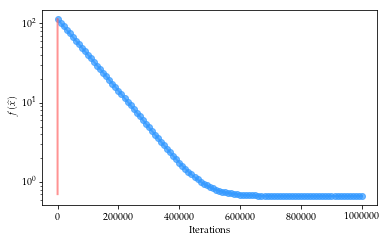

In [14]:
# Run algorithm
epsilon = 1e-3                # Precision parameter
iters = 100
eta = 0.25
verbose = 1
l = 0.1

n = 10000
p = 1000

y = 2*np.random.randint(0,2,size=n)-1   
A = np.random.randn(n, p)
x_init = np.random.randn(p)

x_GD, f_list_GD = GD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
x_SGD, f_list_SGD = SGD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(f_list_GD)*n, n)
xs_SGD = range(len(f_list_SGD))
plt.plot(xs_GD, f_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, f_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$f(\widehat{x})$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### SVRG 

In [15]:
def SVRG_logistic(y, A, l, x_new, eta, iters, epsilon, verbose):
    n, p = np.shape(A)
        
    f_list = [f(x_new, y, A, l)]

    inner_iters = iters//100
    
    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad_full = np.zeros(p)
        for j in range(n):
            a = A[j, :]
            grad_full += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
        grad_full += 2 * l * x_old
        
        x_tilde = x_old

        for q in range(inner_iters):
        
            grad_1 = np.zeros(p)
            grad_2 = np.zeros(p)
            
            J = np.random.randint(n, size = 50)
            for j in J:
                a = A[j, :]
                grad_1 += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_tilde)))) * a.T
                grad_2 += (1/n) * (-y[j] / (1 + np.exp(y[j] * a.dot(x_old)))) * a.T
            grad_1 += 2 * l * x_tilde
            grad_2 += 2 * l * x_old
    
            # Perform gradient step
            x_tilde = x_tilde - eta * (grad_1 - (grad_2 - grad_full))    
        
        x_new = x_tilde
        
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        f_list.append(f(x_new, y, A, l))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_star||_2 = " + str(la.norm(x_new - x_old, 2)) + ", f(x_new) = " + str(f(x_new, y, A, l)))
    
    print("Number of steps:", len(f_list))
    return x_new, f_list

49.999999999999844
iter# = 0, ||x_new - x_old||_2 = 0.6864496071985823, f(x_new) = 111.82826361797184
iter# = 1, ||x_new - x_old||_2 = 0.6727043657300599, f(x_new) = 107.34826206270046
iter# = 2, ||x_new - x_old||_2 = 0.659233171791204, f(x_new) = 103.04589591562902
iter# = 3, ||x_new - x_old||_2 = 0.6460305012819337, f(x_new) = 98.91413798506059
iter# = 4, ||x_new - x_old||_2 = 0.6330909375991536, f(x_new) = 94.94623956333464
iter# = 5, ||x_new - x_old||_2 = 0.620409171312866, f(x_new) = 91.1357193834497
iter# = 6, ||x_new - x_old||_2 = 0.6079800002022272, f(x_new) = 87.4763529871658
iter# = 7, ||x_new - x_old||_2 = 0.5957983291868749, f(x_new) = 83.96216249334519
iter# = 8, ||x_new - x_old||_2 = 0.5838591697739249, f(x_new) = 80.58740675940622
iter# = 9, ||x_new - x_old||_2 = 0.5721576387569193, f(x_new) = 77.34657193093592
iter# = 10, ||x_new - x_old||_2 = 0.5606889560155727, f(x_new) = 74.23436237507259
iter# = 11, ||x_new - x_old||_2 = 0.5494484413699824, f(x_new) = 71.24569199256

iter# = 99, ||x_new - x_old||_2 = 0.08292772230199215, f(x_new) = 1.7785305120463906
iter# = 100, ||x_new - x_old||_2 = 0.08090295303208617, f(x_new) = 1.7138798676441356
iter# = 101, ||x_new - x_old||_2 = 0.07891926306745378, f(x_new) = 1.652363920432382
iter# = 102, ||x_new - x_old||_2 = 0.07697620155258808, f(x_new) = 1.593842788814234
iter# = 103, ||x_new - x_old||_2 = 0.07507336045312615, f(x_new) = 1.5381818867207202
iter# = 104, ||x_new - x_old||_2 = 0.0732103658175575, f(x_new) = 1.4852517200505209
iter# = 105, ||x_new - x_old||_2 = 0.07138686734814248, f(x_new) = 1.4349277071111697
iter# = 106, ||x_new - x_old||_2 = 0.06960252733063267, f(x_new) = 1.3870900209183392
iter# = 107, ||x_new - x_old||_2 = 0.06785700995585159, f(x_new) = 1.3416234499517872
iter# = 108, ||x_new - x_old||_2 = 0.06614997190474588, f(x_new) = 1.2984172732329977
iter# = 109, ||x_new - x_old||_2 = 0.0644810548043417, f(x_new) = 1.257365145409959
iter# = 110, ||x_new - x_old||_2 = 0.06284987985309858, f(x_

iter# = 197, ||x_new - x_old||_2 = 0.007122909830517411, f(x_new) = 0.4897410661464844
iter# = 198, ||x_new - x_old||_2 = 0.006958117178035624, f(x_new) = 0.4892625069439828
iter# = 199, ||x_new - x_old||_2 = 0.006797366444122494, f(x_new) = 0.4888057967153212
iter# = 200, ||x_new - x_old||_2 = 0.006640550591172304, f(x_new) = 0.4883699089971084
iter# = 201, ||x_new - x_old||_2 = 0.006487565639975364, f(x_new) = 0.48795386719557265
iter# = 202, ||x_new - x_old||_2 = 0.006338310579971444, f(x_new) = 0.4875567420745886
iter# = 203, ||x_new - x_old||_2 = 0.006192687281831295, f(x_new) = 0.48717764937454106
iter# = 204, ||x_new - x_old||_2 = 0.006050600412337196, f(x_new) = 0.4868157475550869
iter# = 205, ||x_new - x_old||_2 = 0.005911957351531947, f(x_new) = 0.4864702356551672
iter# = 206, ||x_new - x_old||_2 = 0.005776668112104571, f(x_new) = 0.4861403512640463
iter# = 207, ||x_new - x_old||_2 = 0.005644645260979381, f(x_new) = 0.4858253685974664
iter# = 208, ||x_new - x_old||_2 = 0.0055

iter# = 100, ||x_new - x_old||_2 = 0.08687583977298495, f(x_new) = 3.3332145129324955
iter# = 101, ||x_new - x_old||_2 = 0.08475066322002847, f(x_new) = 3.236341054383746
iter# = 102, ||x_new - x_old||_2 = 0.08279260820440755, f(x_new) = 3.143036497275634
iter# = 103, ||x_new - x_old||_2 = 0.08167526644699698, f(x_new) = 3.0526075318041768
iter# = 104, ||x_new - x_old||_2 = 0.07953495844292163, f(x_new) = 2.9659506907602666
iter# = 105, ||x_new - x_old||_2 = 0.07954197154629757, f(x_new) = 2.8807001079935977
iter# = 106, ||x_new - x_old||_2 = 0.07658772529128278, f(x_new) = 2.7999563724071135
iter# = 107, ||x_new - x_old||_2 = 0.07519677382449212, f(x_new) = 2.7221797667621432
iter# = 108, ||x_new - x_old||_2 = 0.07437866750610675, f(x_new) = 2.645805569393075
iter# = 109, ||x_new - x_old||_2 = 0.07186489565380749, f(x_new) = 2.5737822629850164
iter# = 110, ||x_new - x_old||_2 = 0.07092535139354463, f(x_new) = 2.503509446455137
iter# = 111, ||x_new - x_old||_2 = 0.07089753233991013, f(

iter# = 200, ||x_new - x_old||_2 = 0.014578348395453302, f(x_new) = 0.6962406676971773
iter# = 201, ||x_new - x_old||_2 = 0.013642532665560024, f(x_new) = 0.6943992210795585
iter# = 202, ||x_new - x_old||_2 = 0.013693681046095205, f(x_new) = 0.6926371056559737
iter# = 203, ||x_new - x_old||_2 = 0.01417087236212768, f(x_new) = 0.6908652803434916
iter# = 204, ||x_new - x_old||_2 = 0.014837161264945723, f(x_new) = 0.6889739418595292
iter# = 205, ||x_new - x_old||_2 = 0.014302958431341353, f(x_new) = 0.6873130966951027
iter# = 206, ||x_new - x_old||_2 = 0.014068577787630487, f(x_new) = 0.6856730682519739
iter# = 207, ||x_new - x_old||_2 = 0.014071650632052806, f(x_new) = 0.6839033703940661
iter# = 208, ||x_new - x_old||_2 = 0.01373669196413999, f(x_new) = 0.6824609745867061
iter# = 209, ||x_new - x_old||_2 = 0.01410402813230584, f(x_new) = 0.6811598614240959
iter# = 210, ||x_new - x_old||_2 = 0.013754016677907696, f(x_new) = 0.6797369931737336
iter# = 211, ||x_new - x_old||_2 = 0.013271786

iter# = 298, ||x_new - x_old||_2 = 0.009891348427082586, f(x_new) = 0.6485207947833175
iter# = 299, ||x_new - x_old||_2 = 0.009672267870220463, f(x_new) = 0.6484526363869142
iter# = 300, ||x_new - x_old||_2 = 0.010473110925749705, f(x_new) = 0.648297557486789
iter# = 301, ||x_new - x_old||_2 = 0.009413045915081538, f(x_new) = 0.6481073850523869
iter# = 302, ||x_new - x_old||_2 = 0.009922331944232338, f(x_new) = 0.6481209936159836
iter# = 303, ||x_new - x_old||_2 = 0.009612357772354167, f(x_new) = 0.6481085998338326
iter# = 304, ||x_new - x_old||_2 = 0.010129174297498083, f(x_new) = 0.6480115233692866
iter# = 305, ||x_new - x_old||_2 = 0.009644366427633184, f(x_new) = 0.6481385639806014
iter# = 306, ||x_new - x_old||_2 = 0.009862193846406445, f(x_new) = 0.6479591305694956
iter# = 307, ||x_new - x_old||_2 = 0.009843925418213984, f(x_new) = 0.6479855178827457
iter# = 308, ||x_new - x_old||_2 = 0.009594647603470343, f(x_new) = 0.6478699940469246
iter# = 309, ||x_new - x_old||_2 = 0.0098991

iter# = 399, ||x_new - x_old||_2 = 0.009828597577305654, f(x_new) = 0.6481513332189124
iter# = 400, ||x_new - x_old||_2 = 0.009548167285775785, f(x_new) = 0.6480168390096983
iter# = 401, ||x_new - x_old||_2 = 0.010012366048870855, f(x_new) = 0.6480476835864758
iter# = 402, ||x_new - x_old||_2 = 0.010216837900774387, f(x_new) = 0.6481077975324762
iter# = 403, ||x_new - x_old||_2 = 0.009474044995141154, f(x_new) = 0.6480383676394661
iter# = 404, ||x_new - x_old||_2 = 0.009412862736674276, f(x_new) = 0.6480345025831885
iter# = 405, ||x_new - x_old||_2 = 0.010168905599354504, f(x_new) = 0.648177569507232
iter# = 406, ||x_new - x_old||_2 = 0.010394019215189452, f(x_new) = 0.6481919005262781
iter# = 407, ||x_new - x_old||_2 = 0.009709053649322223, f(x_new) = 0.6482122060421222
iter# = 408, ||x_new - x_old||_2 = 0.009722022012224291, f(x_new) = 0.6482776069685587
iter# = 409, ||x_new - x_old||_2 = 0.00959779622071174, f(x_new) = 0.6485610358641952
iter# = 410, ||x_new - x_old||_2 = 0.00998655

iter# = 495, ||x_new - x_old||_2 = 0.009763681445735067, f(x_new) = 0.6485872664621917
iter# = 496, ||x_new - x_old||_2 = 0.009846277599348786, f(x_new) = 0.648515206761393
iter# = 497, ||x_new - x_old||_2 = 0.009637061416803878, f(x_new) = 0.648660497769739
iter# = 498, ||x_new - x_old||_2 = 0.009588712846723146, f(x_new) = 0.648753032427625
iter# = 499, ||x_new - x_old||_2 = 0.009596799124560795, f(x_new) = 0.6488020444336324
iter# = 500, ||x_new - x_old||_2 = 0.009825911332023443, f(x_new) = 0.6488123533112115
iter# = 501, ||x_new - x_old||_2 = 0.010190690467135667, f(x_new) = 0.6487607291367199
iter# = 502, ||x_new - x_old||_2 = 0.010099377123919447, f(x_new) = 0.6486979435955285
iter# = 503, ||x_new - x_old||_2 = 0.009336833510969698, f(x_new) = 0.6487208386409083
iter# = 504, ||x_new - x_old||_2 = 0.010054869481864272, f(x_new) = 0.6487774852930257
iter# = 505, ||x_new - x_old||_2 = 0.009932798451516817, f(x_new) = 0.6489189018309572
iter# = 506, ||x_new - x_old||_2 = 0.009976943

iter# = 592, ||x_new - x_old||_2 = 0.010191110503609675, f(x_new) = 0.6485043475883894
iter# = 593, ||x_new - x_old||_2 = 0.009987688785343462, f(x_new) = 0.6484776858769161
iter# = 594, ||x_new - x_old||_2 = 0.009571567978355853, f(x_new) = 0.6482869995398381
iter# = 595, ||x_new - x_old||_2 = 0.009969045761205216, f(x_new) = 0.6482945194500134
iter# = 596, ||x_new - x_old||_2 = 0.009779835365963767, f(x_new) = 0.6482339692072934
iter# = 597, ||x_new - x_old||_2 = 0.010267361947796849, f(x_new) = 0.6479865724402122
iter# = 598, ||x_new - x_old||_2 = 0.009479949956737658, f(x_new) = 0.647802774035064
iter# = 599, ||x_new - x_old||_2 = 0.009843028446891703, f(x_new) = 0.6478634556576077
iter# = 600, ||x_new - x_old||_2 = 0.010066895183896203, f(x_new) = 0.6480891029497903
iter# = 601, ||x_new - x_old||_2 = 0.00997386179665429, f(x_new) = 0.6482249497876429
iter# = 602, ||x_new - x_old||_2 = 0.01011530489342322, f(x_new) = 0.6482328746961386
iter# = 603, ||x_new - x_old||_2 = 0.009820975

iter# = 692, ||x_new - x_old||_2 = 0.009837165483245133, f(x_new) = 0.6476430362567048
iter# = 693, ||x_new - x_old||_2 = 0.010619088641723838, f(x_new) = 0.6475491704420769
iter# = 694, ||x_new - x_old||_2 = 0.009171455852522848, f(x_new) = 0.6476494118823817
iter# = 695, ||x_new - x_old||_2 = 0.00952209578524308, f(x_new) = 0.6476545105269015
iter# = 696, ||x_new - x_old||_2 = 0.010098706771885579, f(x_new) = 0.6476986269966526
iter# = 697, ||x_new - x_old||_2 = 0.009637595819815614, f(x_new) = 0.6476445971751739
iter# = 698, ||x_new - x_old||_2 = 0.010227284277083587, f(x_new) = 0.647499282387814
iter# = 699, ||x_new - x_old||_2 = 0.009829274035216006, f(x_new) = 0.6473454078636619
iter# = 700, ||x_new - x_old||_2 = 0.009905947400724523, f(x_new) = 0.6471549504449765
iter# = 701, ||x_new - x_old||_2 = 0.009559225255002043, f(x_new) = 0.6471119207529057
iter# = 702, ||x_new - x_old||_2 = 0.009473814082680502, f(x_new) = 0.6470283777597529
iter# = 703, ||x_new - x_old||_2 = 0.00990770

iter# = 791, ||x_new - x_old||_2 = 0.010087054018076342, f(x_new) = 0.6479711731389299
iter# = 792, ||x_new - x_old||_2 = 0.010037188817497869, f(x_new) = 0.648091781255183
iter# = 793, ||x_new - x_old||_2 = 0.010427723118051088, f(x_new) = 0.6481722763203668
iter# = 794, ||x_new - x_old||_2 = 0.010575495276741833, f(x_new) = 0.6481839461841435
iter# = 795, ||x_new - x_old||_2 = 0.009794995305174926, f(x_new) = 0.6481927665374444
iter# = 796, ||x_new - x_old||_2 = 0.009976351875993002, f(x_new) = 0.648198120593731
iter# = 797, ||x_new - x_old||_2 = 0.009538130367548366, f(x_new) = 0.6479536726554301
iter# = 798, ||x_new - x_old||_2 = 0.009752876669509872, f(x_new) = 0.6480218717886262
iter# = 799, ||x_new - x_old||_2 = 0.009443078279037766, f(x_new) = 0.6479645450523439
iter# = 800, ||x_new - x_old||_2 = 0.009616186138003534, f(x_new) = 0.6478983230535529
iter# = 801, ||x_new - x_old||_2 = 0.010062423505112546, f(x_new) = 0.6479672779681285
iter# = 802, ||x_new - x_old||_2 = 0.00994747

iter# = 891, ||x_new - x_old||_2 = 0.010280622346467993, f(x_new) = 0.6479448924162602
iter# = 892, ||x_new - x_old||_2 = 0.010152689055199607, f(x_new) = 0.6478436047586975
iter# = 893, ||x_new - x_old||_2 = 0.009244178363598705, f(x_new) = 0.6478101012782128
iter# = 894, ||x_new - x_old||_2 = 0.00929131060855024, f(x_new) = 0.6476815166939193
iter# = 895, ||x_new - x_old||_2 = 0.009655794529768622, f(x_new) = 0.6477192213923598
iter# = 896, ||x_new - x_old||_2 = 0.009766474567326449, f(x_new) = 0.6477404359382001
iter# = 897, ||x_new - x_old||_2 = 0.009877131995648367, f(x_new) = 0.6477084849187358
iter# = 898, ||x_new - x_old||_2 = 0.010272093317438623, f(x_new) = 0.6476643868363048
iter# = 899, ||x_new - x_old||_2 = 0.009939379454845456, f(x_new) = 0.647756670427034
iter# = 900, ||x_new - x_old||_2 = 0.009685726329649149, f(x_new) = 0.6479086414232086
iter# = 901, ||x_new - x_old||_2 = 0.009907839183222347, f(x_new) = 0.6479836581321586
iter# = 902, ||x_new - x_old||_2 = 0.00968121

iter# = 989, ||x_new - x_old||_2 = 0.009314623939093812, f(x_new) = 0.6485657890063253
iter# = 990, ||x_new - x_old||_2 = 0.009520905021925121, f(x_new) = 0.6486378889852005
iter# = 991, ||x_new - x_old||_2 = 0.01001502362264123, f(x_new) = 0.6485762344942695
iter# = 992, ||x_new - x_old||_2 = 0.010255945574834868, f(x_new) = 0.6487358167572385
iter# = 993, ||x_new - x_old||_2 = 0.009346609616912471, f(x_new) = 0.6488411160589713
iter# = 994, ||x_new - x_old||_2 = 0.009890144202094409, f(x_new) = 0.648741618202627
iter# = 995, ||x_new - x_old||_2 = 0.009741264976180107, f(x_new) = 0.6487643540808726
iter# = 996, ||x_new - x_old||_2 = 0.01009490569988268, f(x_new) = 0.6486502485702094
iter# = 997, ||x_new - x_old||_2 = 0.00948904751986951, f(x_new) = 0.6486138887058606
iter# = 998, ||x_new - x_old||_2 = 0.009882342735330727, f(x_new) = 0.6486509354375846
iter# = 999, ||x_new - x_old||_2 = 0.009581339361184913, f(x_new) = 0.6486929686919144
Number of steps: 1001
iter# = 0, ||x_new - x_st

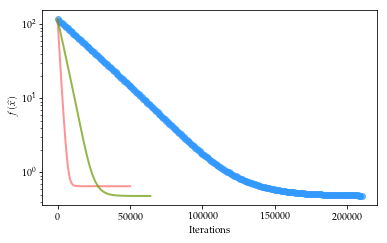

In [16]:
# Run algorithm
epsilon = 5e-3                # Precision parameter
iters = 1000
verbose = 1
l = 0.1

n = 1000
p = 1000

y = 2*np.random.randint(0,2,size=n)-1   

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 50, p)
S = np.diag(S)
A = U.dot(S.dot(V.T))
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

eta = 0.1

x_init = np.random.randn(p)

x_GD, f_list_GD = GD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
x_SGD, f_list_SGD = SGD_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)
eta = 0.1
x_SVRG, f_list_SVRG = SVRG_logistic(y, A, l, x_init, eta, iters, epsilon, verbose)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(0, len(f_list_GD)*n, n)
xs_SGD = range(0, len(f_list_SGD)*50, 50)
xs_SVRG = range(0, len(f_list_SVRG)*2*n, 2*n)

plt.plot(xs_GD, f_list_GD, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_SGD, f_list_SGD, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_SVRG, f_list_SVRG, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$f(\widehat{x})$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()